In [1]:
from pyrosm import get_data
from pyrosm import OSM
import lonboard
from lonboard import Map, ScatterplotLayer, SolidPolygonLayer, PathLayer

In [2]:
# Download the data into specified directory
fp = get_data("freiburg", directory="OSM")
print("Data was downloaded to:", fp)

Data was downloaded to: /Users/lisawinkler/Documents/Work/Meteorology/freiburg/OSM/Freiburg.osm.pbf


In [3]:
# Initialize the OSM parser object
osm = OSM(fp)

<Axes: >

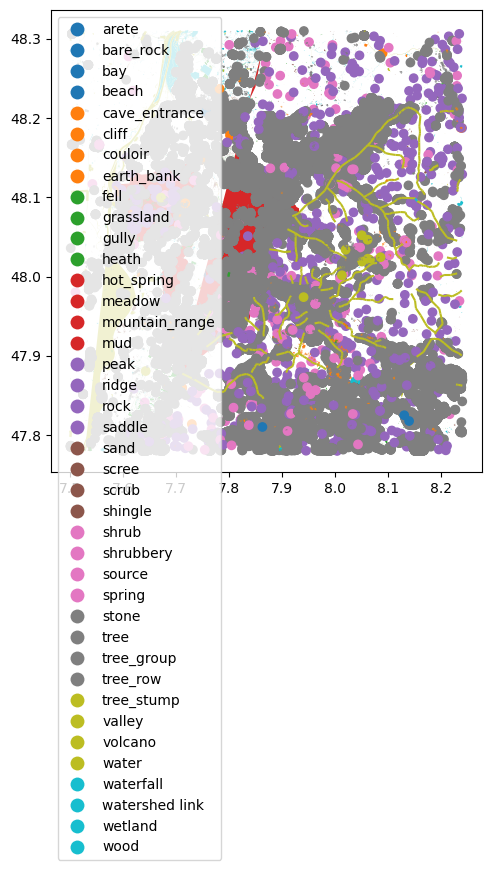

In [4]:
natural = osm.get_natural()
natural.plot(column='natural', legend=True, figsize=(10,6))

In [ ]:
natural.columns

Index(['visible', 'id', 'lat', 'changeset', 'lon', 'timestamp', 'tags',
       'version', 'natural', 'water', 'geometry', 'osm_type', 'grassland',
       'wetland', 'wood', 'heath'],
      dtype='object')

<Axes: >

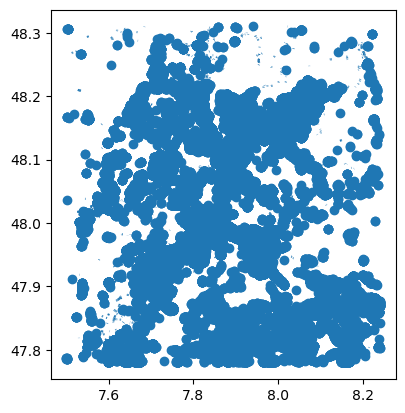

In [6]:
natural[natural['natural'].isin(['tree', 'tree_group', 'tree_row'])].plot()

In [32]:
natural[natural['natural'].isin(['tree', 'tree_group', 'tree_row'])]

,lon,changeset,tags,timestamp,id,lat,version,visible,natural,water,geometry,osm_type,grassland,wetland,wood,heath
5,7.896052,0.0,None,0,185391766,48.096046,0,False,tree,None,POINT (7.89605 48.09605),node,NaN,NaN,NaN,NaN
7,7.832929,0.0,None,0,187023208,48.137093,0,False,tree,None,POINT (7.83293 48.13709),node,NaN,NaN,NaN,NaN
18,7.713064,0.0,"{""name"":""Dorflinde""}",0,258479606,47.933914,0,False,tree,None,POINT (7.71306 47.93391),node,NaN,NaN,NaN,NaN
28,7.860449,0.0,None,0,274902872,48.105721,0,False,tree,None,POINT (7.86045 48.10572),node,NaN,NaN,NaN,NaN
45,7.777667,0.0,"{""name"":""Zieboldlinde"",""tourism"":""viewpoint""}",0,301997963,48.176613,0,False,tree,None,POINT (7.77767 48.17661),node,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182753,NaN,NaN,"{""visible"":false,""leaf_type"":""broadleaved""}",0,1300298393,NaN,0,NaN,tree_row,None,"MULTILINESTRING ((7.84696 47.97949, 7.84659 47...",way,None,None,None,NaN
182756,NaN,NaN,"{""visible"":false,""denotation"":""urban"",""leaf_cy...",0,1302111951,NaN,0,NaN,tree_row,None,"LINESTRING (7.81076 48.02502, 7.8112 48.02515)",way,None,None,None,NaN
182769,NaN,NaN,"{""visible"":false,""denotation"":""avenue"",""leaf_c...",0,1306877289,NaN,0,NaN,tree_row,None,"MULTILINESTRING ((8.2105 48.19994, 8.21076 48....",way,None,None,None,NaN
182770,NaN,NaN,"{""visible"":false,""denotation"":""avenue"",""leaf_c...",0,1306877290,NaN,0,NaN,tree_row,None,"MULTILINESTRING ((8.20992 48.20026, 8.21016 48...",way,None,None,None,NaN


In [26]:
lonboard.viz(natural[natural['natural'].isin(['tree'])])

Map(basemap_style=<CartoBasemap.DarkMatter: 'https://basemaps.cartocdn.com/gl/dark-matter-gl-style/style.json'…

In [28]:
layer1 = ScatterplotLayer.from_geopandas(natural[natural['natural'].isin(['tree'])])

In [67]:
tree_row = natural[natural['natural'].isin(['tree_row'])]

In [75]:
tree_row = tree_row.explode()

/Users/lisawinkler/opt/anaconda3/envs/py312_uscuni_buildingfootprints/lib/python3.12/site-packages/geopandas/geodataframe.py:2469: FutureWarning: The `drop` keyword argument is deprecated and in future the only supported behaviour will match drop=False. To silence this warning and adopt the future behaviour, stop providing `drop` as a keyword to `set_geometry`. To replicate the `drop=True` behaviour you should update your code to
`geo_col_name = gdf.active_geometry_name; gdf.set_geometry(new_geo_col).drop(columns=geo_col_name).rename_geometry(geo_col_name)`.
  return gf.set_geometry(col, drop=drop, inplace=False, crs=crs)


In [77]:
# drop polygons from tree_row
tree_row = tree_row[tree_row.geometry.type == 'LineString']

In [79]:
layer2 = lonboard.PathLayer.from_geopandas(tree_row)

In [80]:
map = Map(layers=[layer1,layer2])

In [81]:
map

Map(layers=[ScatterplotLayer(table=pyarrow.Table
lon: float
changeset: uint8
tags: string
timestamp: uint8
id:…